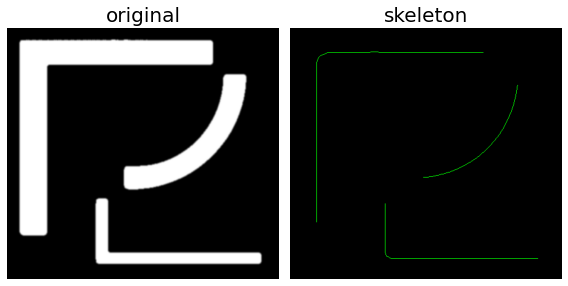

In [9]:
from skimage.morphology import skeletonize
from ponyslayer.utils import imshow, imshows, imdraw, imdraws, imdraws_color, immask, immasks, implot

from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import cv2
import numpy as np

# Invert the horse image
image = cv2.imread("path.png")
# image = cv2.medianBlur(image,5)
# image = cv2.GaussianBlur(image,(5,5),0)
# perform skeletonization
skeleton = skeletonize(image, method='lee')

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

(400, 433, 3)
3


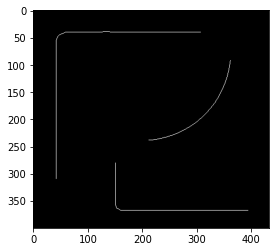

In [10]:
print(skeleton.shape)
gray = cv2.cvtColor(skeleton, cv2.COLOR_RGB2GRAY)
contour,_ = cv2.findContours(gray,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contour))
miku = np.zeros(image.shape[:2], dtype="uint8")
for i in range(len(contour)): miku = cv2.drawContours(miku,contour,-1,255,1)
imshow(miku)
black = np.zeros(image.shape[:2], dtype="uint8")
for c in contour:
    implot(c, black)